In [5]:
import mne
import os
import re

In [9]:
subjects_dir = 'D:\\Ekaterina_Voevodina\\MRI_FS\\'
subject = 'Sub2_memform'

In [8]:
for subject in os.listdir(subjects_dir):
    subject_id = int(re.search(r'\d+', subject).group())
    print(subject, f'sub{subject_id}')

Sub2_memform sub2
Sub3__memform sub3
Sub4_memform sub4
Sub6_memform sub6
Sub8_memform sub8
Sub9_memform sub9
Subject10_memform sub10
Subject11_memform sub11
Subject12_memform sub12
Subject15_memform sub15
Subject17_memform sub17
Subject19_memform sub19
Subject20_memform sub20
Subject22_memform sub22
Subject23_memform sub23
Subject24_memform sub24
Subject25_memform sub25
Subject26_memform sub26
Subject7_memform sub7


In [10]:
subject_dir = os.path.join(subjects_dir, subject)

In [11]:
trans_path = os.path.join(subject_dir,'sub2_trans')

In [37]:
subject_id = int(re.search(r'\d+', subject).group())
root = '../'
subject_meg_dir = os.path.join(
    root, 'data', 'subjects', f'sub{subject_id}'
)
subject_epochs_dir = os.path.join(subject_meg_dir, 'epochs')
subject_epochs_path = os.path.join(subject_epochs_dir, os.listdir(subject_epochs_dir)[0])

epochs = mne.read_epochs(subject_epochs_path)
info = epochs.info

Reading d:\Ekaterina_Voevodina\memory_formation\dirty_field\..\data\subjects\sub2\epochs\enc_epochs.fif ...
    Found the data of interest:
        t =   -1500.00 ...    3995.00 ms
        0 CTF compensation matrices available


C:\Users\CCDM\AppData\Local\Temp\ipykernel_3132\3138727117.py:9: RuntimeWarning: This filename (../data\subjects\sub2\epochs\enc_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(subject_epochs_path)


Not setting metadata
210 matching events found
No baseline correction applied
0 projection items activated


In [12]:
trans = mne.read_trans(trans_path)

In [ ]:

src = mne.setup_source_space(
    subject, spacing='oct4', add_dist='patch',
    subjects_dir=subjects_dir)
print(src)

In [15]:
print(src)

<SourceSpaces: [<surface (lh), n_vertices=158411, n_used=258>, <surface (rh), n_vertices=151372, n_used=258>] MRI (surface RAS) coords, subject 'Sub2_memform', ~27.3 MB>


In [ ]:
conductivity = (0.3,)  # for single layer
# conductivity = (0.3, 0.006, 0.3)  # for three layers
model = mne.make_bem_model(subject=subject, ico=4,
                           conductivity=conductivity,
                           subjects_dir=subjects_dir)
bem = mne.make_bem_solution(model)

In [17]:
bem

<ConductorModel | BEM (1 layer)>

In [ ]:

mne.viz.plot_alignment(info, trans, subject=subject, dig=True,
                       meg=['helmet', 'sensors'], subjects_dir=subjects_dir,
                       surfaces='head-dense')

In [ ]:
src = mne.setup_source_space(subject, spacing='oct6', add_dist='patch', subjects_dir=subjects_dir)

In [26]:
src

<SourceSpaces: [<surface (lh), n_vertices=158411, n_used=4098>, <surface (rh), n_vertices=151372, n_used=4098>] MRI (surface RAS) coords, subject 'Sub2_memform', ~28.4 MB>

Using surface: D:\Ekaterina_Voevodina\MRI_FS\Sub2_memform\bem\inner_skull.surf
Using surface: D:\Ekaterina_Voevodina\MRI_FS\Sub2_memform\bem\outer_skull.surf
Using surface: D:\Ekaterina_Voevodina\MRI_FS\Sub2_memform\bem\outer_skin.surf


d:\Ekaterina_Voevodina\memory_formation\venv\lib\site-packages\mne\viz\utils.py:124: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


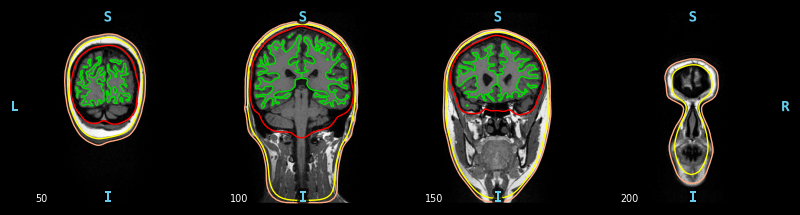

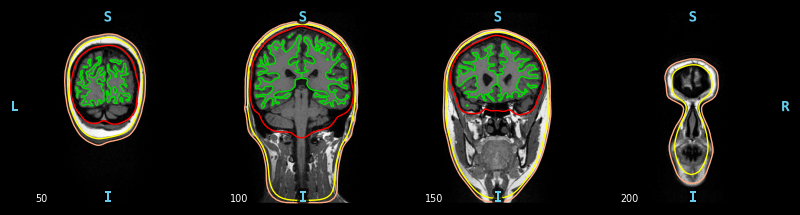

In [28]:
plot_bem_kwargs = dict(
    subject=subject, subjects_dir=subjects_dir,
    brain_surfaces='white', orientation='coronal',
    slices=[50, 100, 150, 200])
mne.viz.plot_bem(**plot_bem_kwargs)

Using surface: D:\Ekaterina_Voevodina\MRI_FS\Sub2_memform\bem\inner_skull.surf
Using surface: D:\Ekaterina_Voevodina\MRI_FS\Sub2_memform\bem\outer_skull.surf
Using surface: D:\Ekaterina_Voevodina\MRI_FS\Sub2_memform\bem\outer_skin.surf


d:\Ekaterina_Voevodina\memory_formation\venv\lib\site-packages\mne\viz\utils.py:124: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


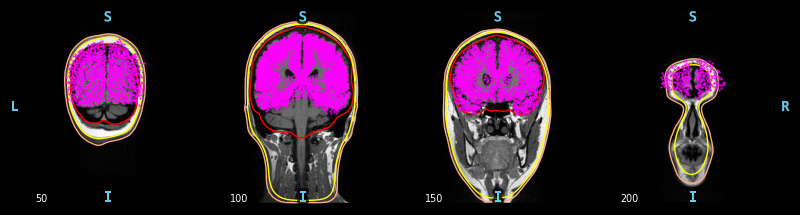

In [29]:
mne.viz.plot_bem(src=src, **plot_bem_kwargs)

In [ ]:
fig = mne.viz.plot_alignment(subject=subject, subjects_dir=subjects_dir,
                             surfaces='white', coord_frame='mri',
                             src=src)
mne.viz.set_3d_view(fig, azimuth=173.78, elevation=101.75,
                    distance=0.30, focalpoint=(-0.03, -0.01, 0.03))

In [ ]:
fwd = mne.make_forward_solution(info, trans=trans, src=src, bem=bem,
                                meg=True, eeg=False, mindist=5.0, n_jobs=None,
                                verbose=True)

In [35]:
fwd

Good channels,"204 Gradiometers, 102 Magnetometers"
Bad channels,None
Source space,Surface with 8192 vertices
Source orientation,Free


In [36]:
print(f'Before: {src}')
print(f'After:  {fwd["src"]}')

Before: <SourceSpaces: [<surface (lh), n_vertices=158411, n_used=4098>, <surface (rh), n_vertices=151372, n_used=4098>] MRI (surface RAS) coords, subject 'Sub2_memform', ~28.4 MB>
After:  <SourceSpaces: [<surface (lh), n_vertices=158411, n_used=4094>, <surface (rh), n_vertices=151372, n_used=4098>] head coords, subject 'Sub2_memform', ~28.4 MB>


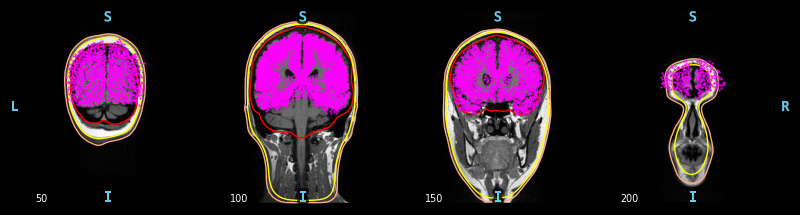

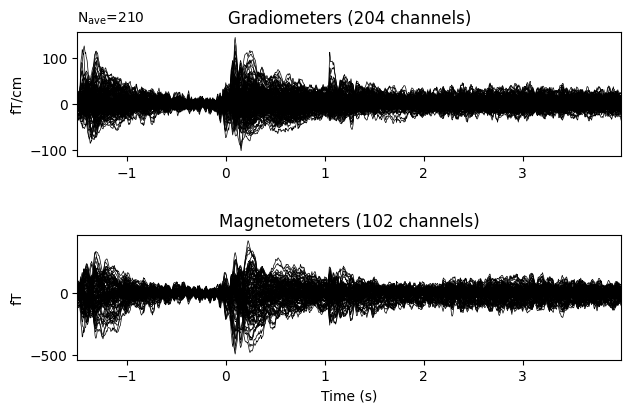

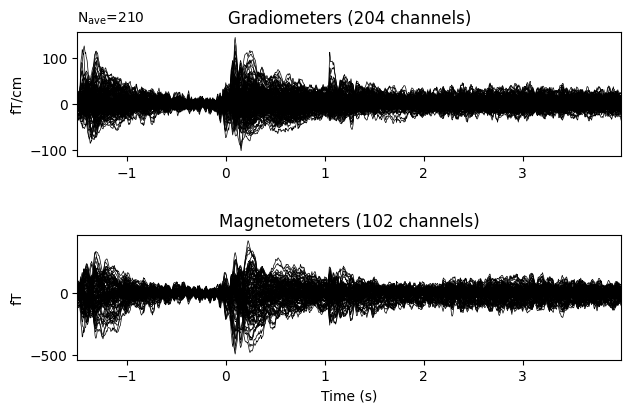

In [38]:
epochs.average().plot()

In [40]:
data_cov = mne.compute_covariance(epochs, tmin=-.5, tmax=1.5,
                                  method='empirical')
noise_cov = mne.compute_covariance(epochs, tmin=3.25, tmax=3.75,
                                   method='empirical')

Computing rank from data with rank=None
    Using tolerance 2.8e-08 (2.2e-16 eps * 306 dim * 4.2e+05  max singular value)
    Estimated rank (mag + grad): 306
Found multiple SSS records. Using the first.
    MEG: rank 306 computed from 306 data channels with 0 projectors


C:\Users\CCDM\AppData\Local\Temp\ipykernel_3132\1692997622.py:1: RuntimeWarning: Something went wrong in the data-driven estimation of the data rank as it exceeds the theoretical rank from the info (306 > 80). Consider setting rank to "auto" or setting it explicitly as an integer.
  data_cov = mne.compute_covariance(epochs, tmin=-.5, tmax=1.5,


Reducing data rank from 306 -> 306
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 84210
[done]
Computing rank from data with rank=None
    Using tolerance 1.5e-08 (2.2e-16 eps * 306 dim * 2.2e+05  max singular value)
    Estimated rank (mag + grad): 306
Found multiple SSS records. Using the first.
    MEG: rank 306 computed from 306 data channels with 0 projectors
Reducing data rank from 306 -> 306
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 21210
[done]


C:\Users\CCDM\AppData\Local\Temp\ipykernel_3132\1692997622.py:3: RuntimeWarning: Something went wrong in the data-driven estimation of the data rank as it exceeds the theoretical rank from the info (306 > 80). Consider setting rank to "auto" or setting it explicitly as an integer.
  noise_cov = mne.compute_covariance(epochs, tmin=3.25, tmax=3.75,


Computing rank from covariance with rank=None
    Using tolerance 4.5e-14 (2.2e-16 eps * 102 dim * 2  max singular value)
    Estimated rank (mag): 80
Found multiple SSS records. Using the first.
    MAG: rank 80 computed from 102 data channels with 0 projectors
Computing rank from covariance with rank=None
    Using tolerance 5.4e-13 (2.2e-16 eps * 204 dim * 12  max singular value)
    Estimated rank (grad): 80
Found multiple SSS records. Using the first.
    GRAD: rank 80 computed from 204 data channels with 0 projectors


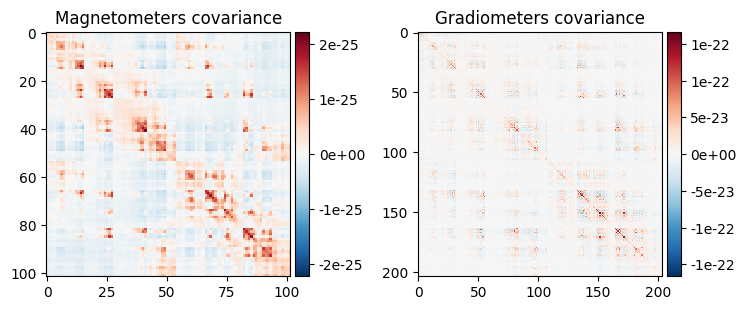

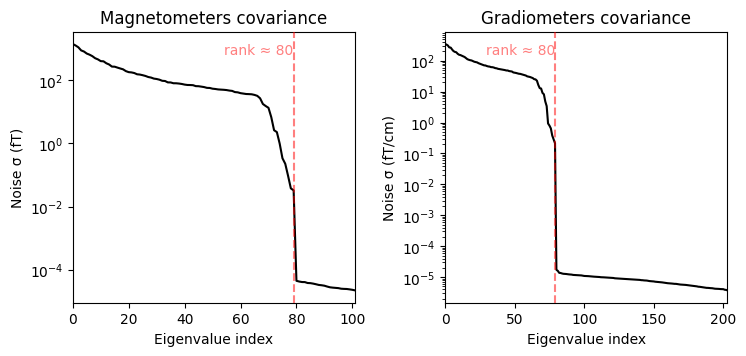

(<Figure size 760x370 with 4 Axes>, <Figure size 760x370 with 2 Axes>)

In [41]:
data_cov.plot(epochs.info)

Computing rank from covariance with rank=None
    Using tolerance 4.9e-14 (2.2e-16 eps * 102 dim * 2.2  max singular value)
    Estimated rank (mag): 80
Found multiple SSS records. Using the first.
    MAG: rank 80 computed from 102 data channels with 0 projectors
Computing rank from covariance with rank=None
    Using tolerance 6.9e-13 (2.2e-16 eps * 204 dim * 15  max singular value)
    Estimated rank (grad): 80
Found multiple SSS records. Using the first.
    GRAD: rank 80 computed from 204 data channels with 0 projectors


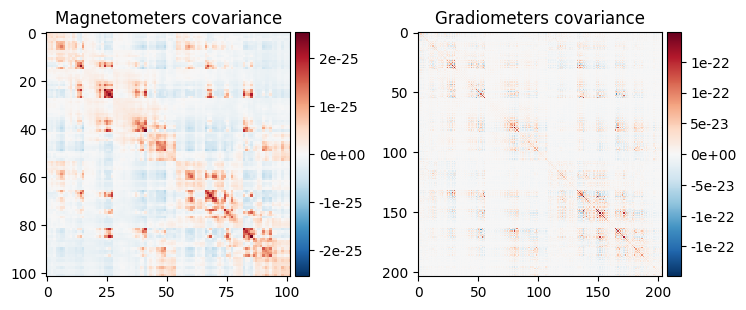

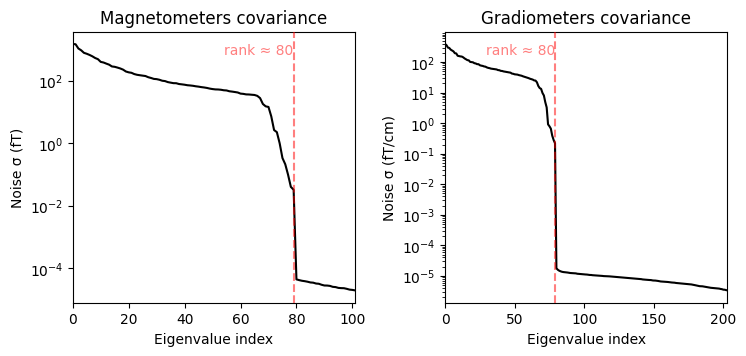

(<Figure size 760x370 with 4 Axes>, <Figure size 760x370 with 2 Axes>)

In [42]:
noise_cov.plot(epochs.info)

In [43]:
filters = mne.beamformer.make_lcmv(info, fwd, data_cov, reg=0.05,
                    noise_cov=noise_cov, pick_ori='max-power',
                    weight_norm='unit-noise-gain', rank=None)

Computing rank from covariance with rank=None
    Using tolerance 9.1e-13 (2.2e-16 eps * 306 dim * 13  max singular value)
    Estimated rank (mag + grad): 80
    MEG: rank 80 computed from 306 data channels with 0 projectors
Computing rank from covariance with rank=None
    Using tolerance 1.2e-12 (2.2e-16 eps * 306 dim * 17  max singular value)
    Estimated rank (mag + grad): 80
    MEG: rank 80 computed from 306 data channels with 0 projectors
Making LCMV beamformer with rank {'meg': 80}
Computing inverse operator with 306 channels.
    306 out of 306 channels remain after picking
Selected 306 channels
Whitening the forward solution.
Computing rank from covariance with rank={'meg': 80}
    Setting small MEG eigenvalues to zero (without PCA)
Creating the source covariance matrix
Adjusting source covariance matrix.
Computing beamformer filters for 8192 sources
Filter computation complete


In [44]:
filters

<Beamformer | LCMV, subject "Sub2_memform", 8192 vert, 306 ch, max-power ori, unit-noise-gain norm, matrix inversion, rank 80>

In [52]:
# stc = mne.beamformer.apply_lcmv_epochs(epochs, filters)
stc = mne.beamformer.apply_lcmv(epochs.average(), filters)

In [53]:
stc

<SourceEstimate | 8192 vertices, subject : Sub2_memform, tmin : -1500.0 (ms), tmax : 3995.0 (ms), tstep : 5.0 (ms), data shape : (8192, 1100), ~68.8 MB>

In [47]:
lims = [0.3, 0.45, 0.6]
kwargs = dict(src=src, subject=subject, subjects_dir=subjects_dir,
              initial_time=None, verbose=True)

In [56]:
stc.plot(hemi='both', clim=dict(kind='value', pos_lims=lims), **kwargs)

For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
To use light mode, "qdarkstyle" has to be installed! You can install it with:
pip install qdarkstyle

For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
To use light mode, "qdarkstyle" has to be installed! You can install it with:
pip install qdarkstyle

